### 非线性方程求解

使用fsolve()可对非线性方程组求解，调用形式：fsolve(func,x0)。其中func是计算方程组误差的函数，它的参数x为一个数组，其值可能是方程组的一组解。func返回将x带入方程组中每个方程的误差，x0为方程组解的初始值。假如对下面方程组求解：

    f1(u1,u2,u3)=0  
    f2(u1,u2,u3)=0  
    f3(u1,u2,u3)=0  
    那么func函数可以这样定义：  
    def func(x):  
        u1,u2,u3=x  
        return [f1(u1,u2,u3),f2(u1,u2,u3),f3(u1,u2,u3)]

例如对下面方程组求解：

$$5x_1+3=0$$
$${4x_0}^2-2\sin(x_1x_2)=0$$
$$x_1x_2-1.5=0$$

In [2]:
from math import sin, cos
from scipy import optimize

def f(x):
    x0,x1,x2 = x.tolist()
    return [
        5*x1+3,
        4*x0*x0-2*sin(x1*x2),
        x1*x2-1.5
    ]

# f计算方程组的误差，[1,1,1]是未知数的初始值
result = optimize.fsolve(f,[1,1,1])
print(result)
print(f(result))    

[-0.70622057 -0.6        -2.5       ]
[0.0, -9.126033262418787e-14, 5.329070518200751e-15]


先调用数组的tolist()函数，将数组转化为python的标准浮点型列表，然后调用math模块中的函数进行计算。因为在进行单个数值的运算时， 标准浮点类型比numpy的浮点类型要快许多， 所以把数值都转换成标准浮点数类型， 能缩短一些计算时间。 

### 最小二乘拟合

假设有一组实验数据$(x_i,y_i)$，我们事先知道它们之间应该满足某函数关系：$y_i=f(x_i)$。通过这些已知信息， 需要确定函数$f()$的一些参数。例如， 如果函数$f()$是线性函数$f(x)=kx+b$，那么参数k和b 就是需要确定的值。

如果用$\bf{p}$表示函数中需要确定的参数， 则目标是找到一组$\bf{p}$使得函数S的值最小：

$$S(p)=\sum_{i=1}^{m} {[y_i-f(x_i,p)]^2}$$

这种算法被称为最小二乘拟合(least_-square fitting)。在optimize模块中,可以使用leastsq()对数据进行最小二乘拟合计算。leastsq()的用法很简单，只需要将计算误差的函数和待确定参数的初始值传递给它即可。下面是用leastsq()对线性函数进行拟合的程序：

#### 线性方程拟合实例

0.6134953491930442 1.794092543259387


<function matplotlib.pyplot.show(*args, **kw)>

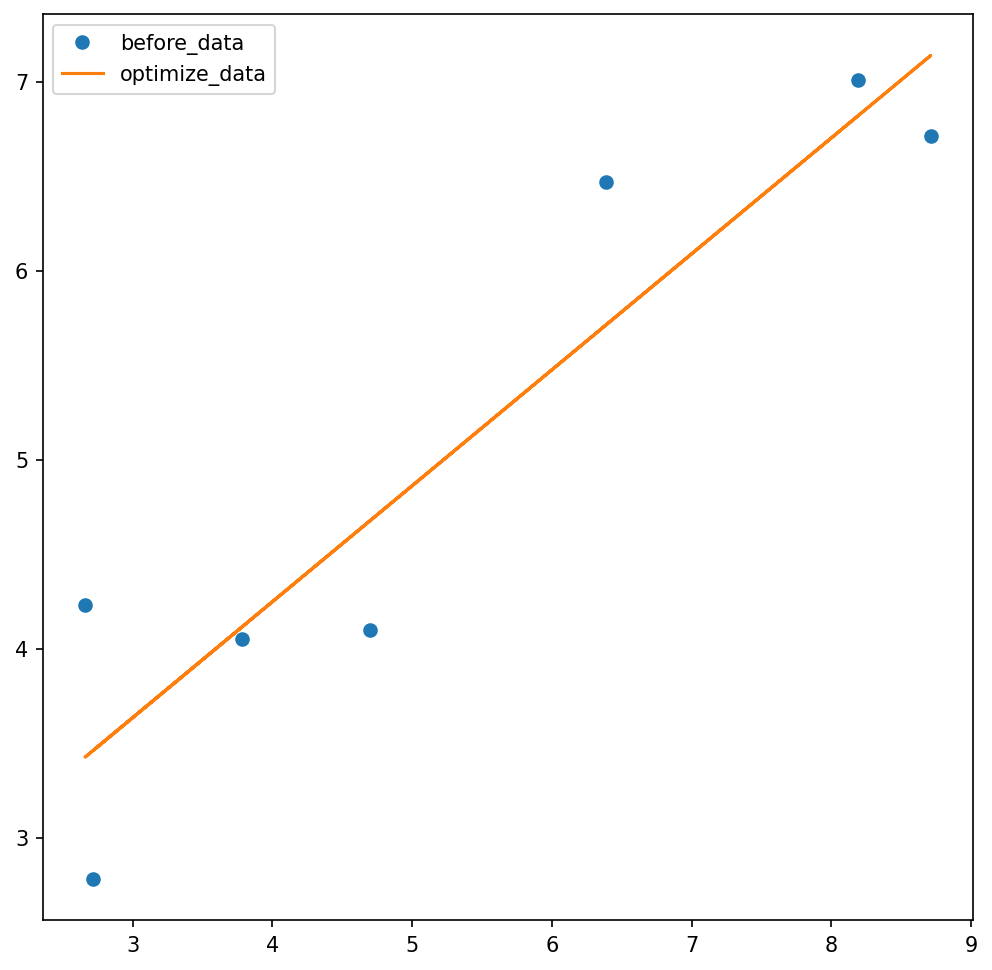

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

X = np.array([ 8.19, 2.72, 6.39, 8.71, 4.7, 2.66, 3.78])
Y = np.array([ 7.01, 2.78, 6.47, 6.71, 4.1, 4.23, 4.05])

def residuals(p):
    '''计算以p为参数的直线和原数据之间的误差'''
    k,b = p
    return Y-(k*X+b)

# 调用leastsq()函数使得误差平方和最小，k，b初始值为[1,0]
r=optimize.leastsq(residuals,[1,0])
k,b=r[0]
# print('k='+k,'b='+b)
print(k,b)

fig = plt.figure(figsize=(8,8), dpi=150)
plt.plot(X,Y,"o",label='before_data')
plt.plot(X,k*X+b,label='optimize_data')
plt.legend(loc='best')
plt.show
    

#### 正弦波拟合实例

真实参数 [10, 0.34, 0.5235987755982988]
拟合参数 [10.25218748  0.3423992   0.50817423]


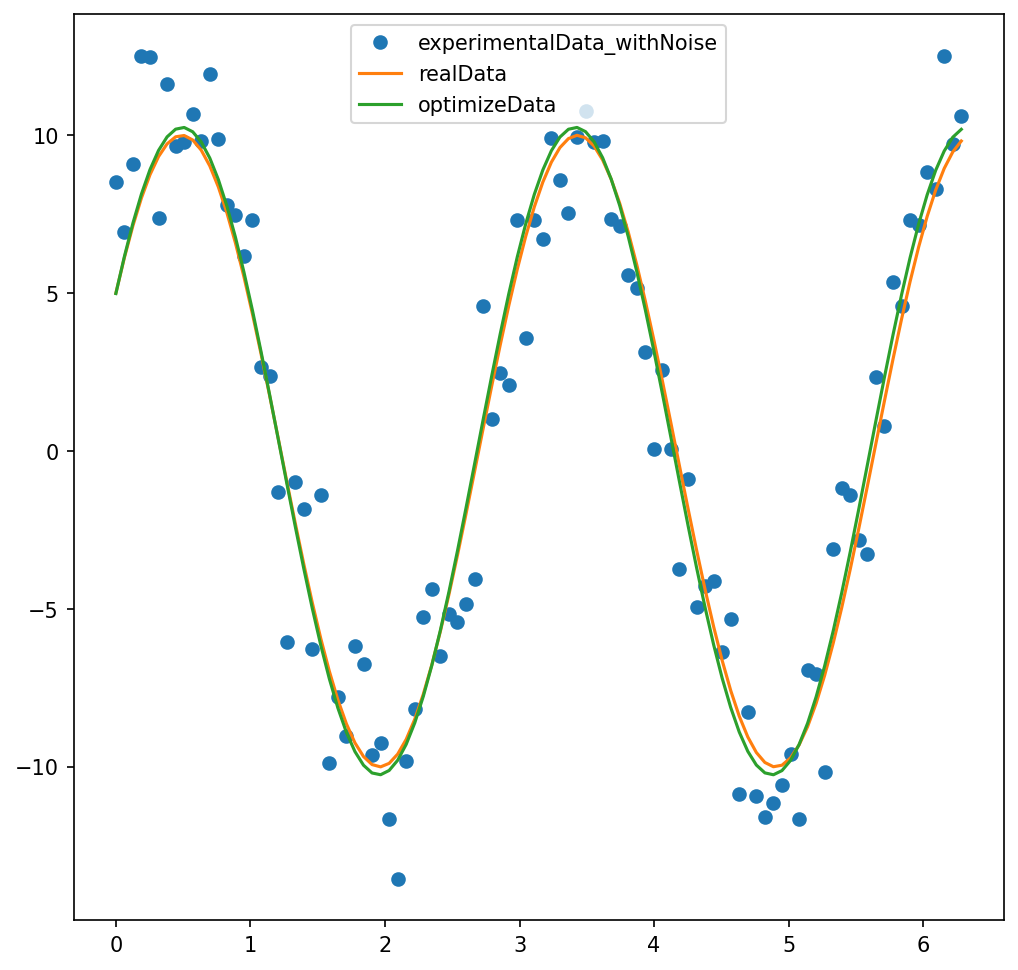

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

def func(x, p):
    A, k, theta = p
    '''数据拟合所用的函数：A*np.sin(2*np.pi*k*x+theta)'''
    return A*np.sin(2*np.pi*k*x+theta)

def residuals(p,y,x):
    '''实验数据x, y 和拟合函数之间的差， p 为拟合需要找到的系数'''
    return y - func(x,p)

x=np.linspace(0,2*np.pi,100)
'''真实数据的函数参数'''
A, k, theta = 10, 0.34, np.pi/6
'''真实数据'''
y0= func(x,[A, k, theta])

'''加入噪声之后的数据'''
np.random.seed(0)
y1 = y0+2*np.random.randn(len(x))

'''第一次拟合猜测的参数'''
p0 = [7,0.40,0]

'''
调用leastsq()进行数据拟合
residuals为计算误差的函数
p0为拟合参数的初始值
args为需要拟合的实验数据
'''
plsq = optimize.leastsq(residuals,p0,args=(y1,x))

print ("真实参数",[A, k, theta])
print ("拟合参数",plsq[0])

fig = plt.figure(figsize=(8,8), dpi=150)
plt.plot(x,y1,"o",label="experimentalData_withNoise")
plt.plot(x,y0,label="realData")
plt.plot(x,func(x,plsq[0]),label="optimizeData")
plt.legend(loc="best")

plt.show()

程序中,要拟合的目标函数func()是一个正弦函数,它的参数p是一个数组，包含决定正弦波的三个参数A、k、theta, 分別对应正弦函数的振幅、频率和相角。待拟合的实验数据是一组包含噪声的数据$(x,y_1)$, 其中数组$y_1$为标准正弦波数据$y_0$加上随机噪声。

用$leastsq()$对带噪声的实验数据$(x,y_1)$进行数据拟合,它可以找到数组$x$和$y_0$之间的正弦关系，即确定A、k、theta等参数。和前而的直线拟合程序不同的是，这里我们将$(y_1,x)$传递给args参数。$leastsq()$会将这两个额外的参数传递给$residuals()$。因此$residuals()$有三个参数,p是正弦函数的参数,y和x是表示实验数据的数组。

对于一维曲线的拟合，optimize模块还提供了一个curve_fit()函数，下而使用此函数对正弦波数据进行拟合。

真实参数 [10, 0.34, 0.5235987755982988]
拟合参数 [10.25218748  0.3423992   0.50817425]


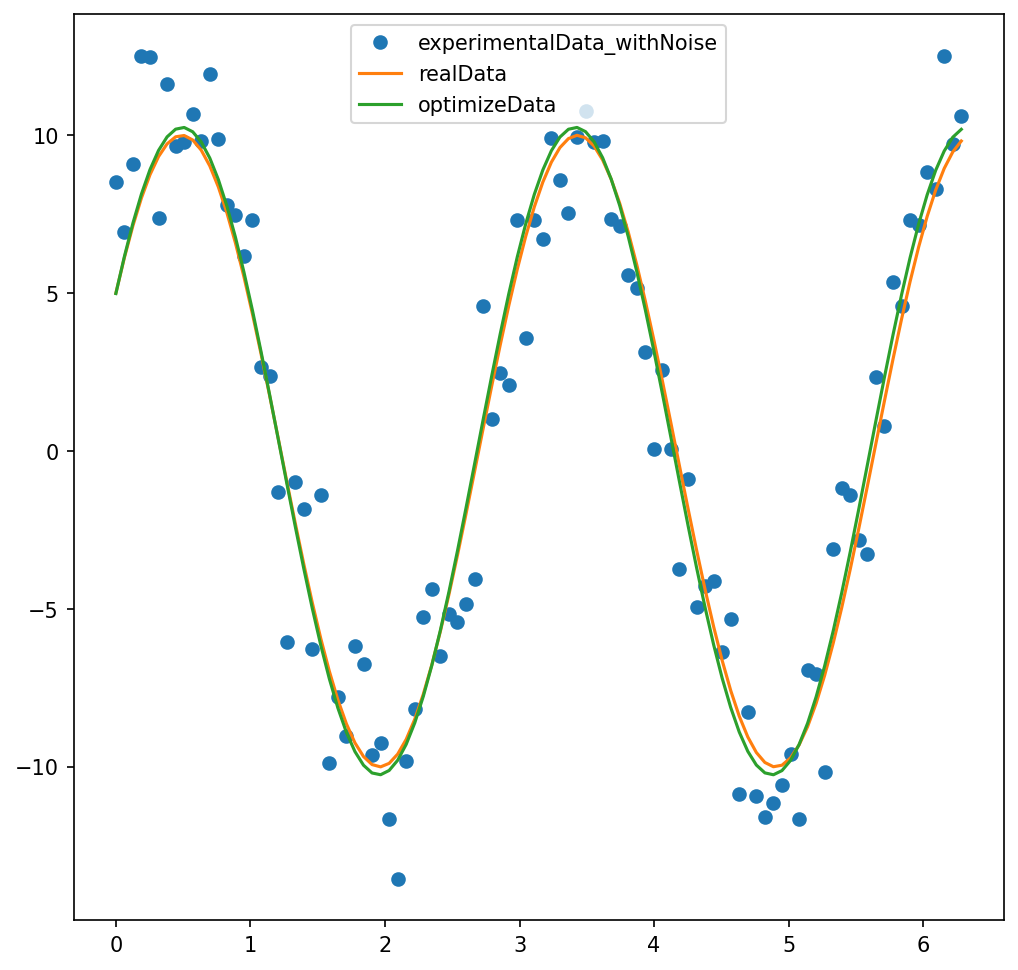

In [3]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

def func2(x,A,k,theta):
    '''数据拟合所用的函数：A*np.sin(2*np.pi*k*x+theta)'''
    return A*np.sin(2*np.pi*k*x+theta)

x=np.linspace(0,2*np.pi,100)
'''真实数据的函数参数'''
A, k, theta = 10, 0.34, np.pi/6
'''真实数据'''
y0= func(x,[A, k, theta])

'''加入噪声之后的数据'''
np.random.seed(0)
y1 = y0+2*np.random.randn(len(x))

'''第一次拟合猜测的参数'''
p0 = [7,0.40,0]

'''
调用leastsq()进行数据拟合
residuals为计算误差的函数
p0为拟合参数的初始值
args为需要拟合的实验数据
'''
popt= optimize.curve_fit(func2,x,y1,p0)

print ("真实参数",[A, k, theta])
print ("拟合参数",popt[0])

fig = plt.figure(figsize=(8,8), dpi=150)
plt.plot(x,y1,"o",label="experimentalData_withNoise")
plt.plot(x,y0,label="realData")
plt.plot(x,func(x,popt[0]),label="optimizeData")
plt.legend(loc="best")

plt.show()

如果频率的初值和真实值的差别较大，拟合结果中的频率参数可能无法收敛于实际的频率。在下面的例子中，由于频率初值的选择不当，导致curve_fit()未能收敛到真实的参数。这时可以通过其他方法先估算一个频率的近似值， 或者使用**全局优化算法**。在后面的例子中， 我们会使用全局优化算法重新对正弦波数据进行拟合。

真实参数 [10, 0.34, 0.5235987755982988]
拟合参数 [ 0.71093469  1.02074585 -0.12776742]


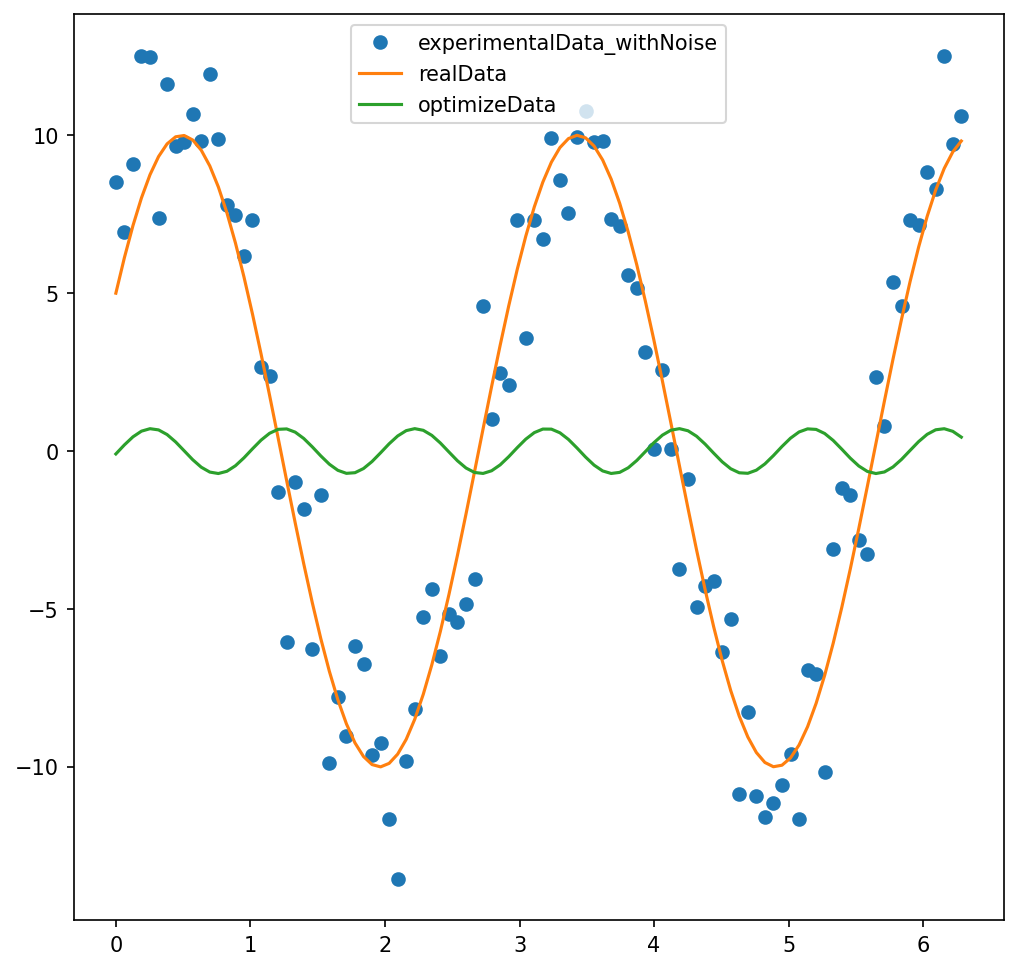

In [4]:
popt1 = optimize.curve_fit(func2,x,y1,p0=[10,1,0])
print ("真实参数",[A, k, theta])
print ("拟合参数",popt1[0])

fig = plt.figure(figsize=(8,8), dpi=150)
plt.plot(x,y1,"o",label="experimentalData_withNoise")
plt.plot(x,y0,label="realData")
plt.plot(x,func(x,popt1[0]),label="optimizeData")
plt.legend(loc="best")

plt.show()

### 函数局域最小值

optimize库中提供了许多求函数最小值的方法：Nelder-Mead、Powell、CG、BFGS、Newton-CG、L-BFGS-B等。下面我们用一个实例观察这些优化函数是如何找到函数的最小值的。在本例中要计算最小值的函数$f(x，y)$为：
$$f(x,y)=(1-x)^2+100(y-x^2)^2$$
这个函数叫作 Rosenbrock函数， 它经常用来测试最小化算法的收敛速度。它有一个十分平坦的山谷区域,收敛到此山谷区域比较容易,但是在山谷区域搜索到最小点则比较困难。根据函数的计算公式不难看出此函数的最小值是0,在(1,1)处。

为了提高运算速度和精度，有些算法带有一个fprime参数，它是计算目标函数f()对各个自变量的偏导数的函数。f(x,y)对变量x和y的偏导函数为：
$$\frac{\partial f}{\partial x}=-2+2x-400x(y-x^2)$$
$$\frac{\partial f}{\partial y}=200y-200x^2$$

Newton-CG 算法则需要计算海森矩阵,它是一个由自变量为以量的实值函数的二阶偏导数构成的方块矩阵，对于函数$f(x_1,x_2,\cdots,x_n)$,其海森矩阵的定义如下：
$$ \begin{bmatrix}
    \frac{\partial^2 f}{\partial x_1^2}&\frac{\partial^2 f}{\partial x_1 \partial x_2}&\cdots&\frac{\partial^2 f}{\partial x_1 \partial x_n}\\
    \frac{\partial^2 f}{\partial x_2 \partial x_1}&\frac{\partial^2 f}{\partial x_2^2}&\cdots&\frac{\partial^2 f}{\partial x_2 \partial x_n}\\
    \vdots&\vdots&\vdots&\vdots\\
    \frac{\partial^2 f}{\partial x_n \partial x_1}&\frac{\partial^2 f}{\partial x_n \partial x_2}&\cdots&\frac{\partial^2 f}{\partial x_n^2}\\
    \end{bmatrix} $$

对于本例来讲，海森矩阵为一二阶矩阵：
$$ \begin{bmatrix}
    2(600x^2-200y+1)&-400x\\
    -400x&200\\
    \end{bmatrix}
$$

下面使用各种最小值优化算法计算f(x，y)的最小值， 根据其输出可知有些算法需要较长的收敛时间， 而有些算法则利用导数信息更快地找到最小点。

In [10]:
import numpy as np
from scipy import optimize
def target_function(x,y):
    '''目标函数'''
    return (1-x)**2 + 100*(y-x**2)**2

class TargetFunction(object):
    def __init__(self):
        '''类初始化函数定义'''
        self.f_points = [ ]
        self.fprime_points = [ ]
        self.fhess_points = [ ]
    
    def f(self,p):
        '''f()函数返回点p的坐标通目标函数计算的值，并坐标添加入f_points列表'''
        x,y = p.tolist()
        z = target_function(x,y)
        self.f_points.append((x,y))
        return z
    def fprime(self,p):
        '''fprime()函数返回点p偏导值列表，并将坐标添加入fprime_point列表'''
        x,y = p.tolist()
        self.fprime_points.append((x,y))
        dx = -2+2*x-400*x*(y-x*x)
        dy = 200*y-200*x*x
        return np.array([dx,dy])
    def fhess(self,p):
        '''fhess()函数返回点p海森矩阵转化列表，并将坐标添加入fhess_point列表'''
        x,y = p
        self.fhess_points.append((x,y))
        return np.array([[2*(600*x*x-200*y+1),-400*x],[-400*x,200]])
    
def fmin_demo(method):
    '''初始化一个对象'''
    target = TargetFunction()
    '''定义初始化点'''
    init_point=(-1,-1)
    res = optimize.minimize(target.f,init_point,method=method,jac=target.fprime,hess=target.fhess)
    return res, [np.array(points)for points in (target.f_points,target.fprime_points,target.fhess_points)]

methods = ('Nelder-Mead','Powell','CG','BFGS','NewTon-CG','L-BFGS-B')
for method in methods:
    res,(f_points,fprime_points,fhess_points) = fmin_demo(method)
    print("{:12s}: min={:12g},f_count={:3d},fprime_count={:3d},fhess_count={:3d}".\
          format(method,float(res["fun"]),len(f_points),len(fprime_points),len(fhess_points)))

Nelder-Mead : min= 5.30934e-10,f_count=125,fprime_count=  0,fhess_count=  0
Powell      : min=           0,f_count= 52,fprime_count=  0,fhess_count=  0
CG          : min= 9.63038e-21,f_count= 39,fprime_count= 39,fhess_count=  0
BFGS        : min= 1.84992e-16,f_count= 40,fprime_count= 40,fhess_count=  0
NewTon-CG   : min= 5.22666e-10,f_count= 60,fprime_count= 97,fhess_count= 38
L-BFGS-B    : min=  6.5215e-15,f_count= 33,fprime_count= 33,fhess_count=  0


c:\users\wangkehai\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\_minimize.py:505: RuntimeWarning: Method Powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,
c:\users\wangkehai\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\_minimize.py:510: RuntimeWarning: Method Powell does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
c:\users\wangkehai\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\_minimize.py:510: RuntimeWarning: Method CG does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
c:\users\wangkehai\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\_minimize.py:510: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
c:\use

### 全局优化函数

前而介绍的几种最小值优化算法都只能计算局域的最小值，optimize库还提供了几种能进行全局优化的算法，下而以前而的正弦波拟合为例，演示全局优化函数的用法。
在使用 leastsq()对正弦波进行拟合时，误差函数resduals()返回一个数组，表示各个取样点的误差。而函数最小值算法则只能对一个标量值进行最小化， 因此最小化的目标函数func_error()返回所有取样点的误差的平方和。

真实参数 [10, 0.34, 0.5235987755982988]
拟合参数 [-10.25218747   0.34239906  -2.6334151 ]


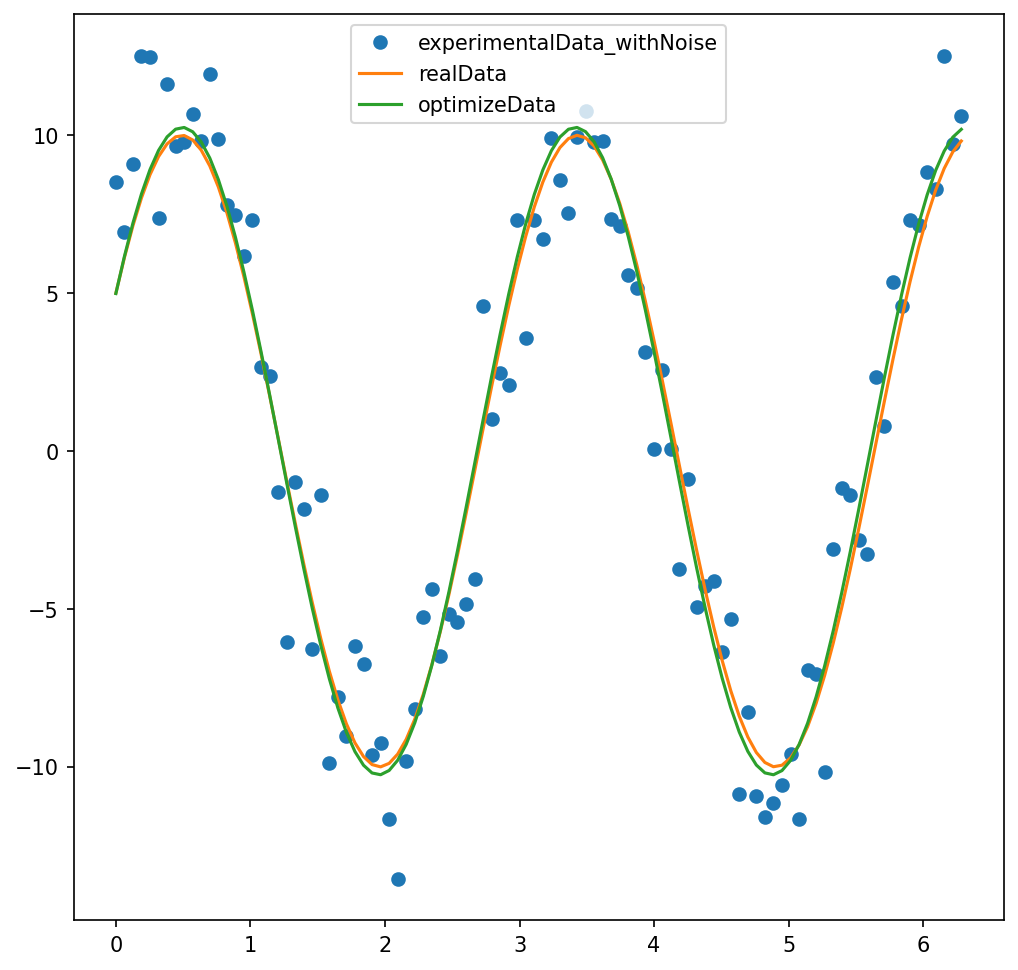

In [5]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

def func(x, p):
    A, k, theta = p
    '''数据拟合所用的函数：A*np.sin(2*np.pi*k*x+theta)'''
    return A*np.sin(2*np.pi*k*x+theta)

def func_error(p,y,x):
    return np.sum((y-func(x,p))**2)

x=np.linspace(0,2*np.pi,100)
'''真实数据的函数参数'''
A, k, theta = 10, 0.34, np.pi/6
'''真实数据'''
y0= func(x,[A, k, theta])

'''加入噪声之后的数据'''
np.random.seed(0)
y1 = y0+2*np.random.randn(len(x))

result = optimize.basinhopping(func_error,(10,1,0),niter=10,minimizer_kwargs={"method":"L-BFGS-B","args":(y1,x)})

print ("真实参数",[A, k, theta])
print ("拟合参数",result.x)

fig = plt.figure(figsize=(8,8), dpi=150)
plt.plot(x,y1,"o",label="experimentalData_withNoise")
plt.plot(x,y0,label="realData")
plt.plot(x,func(x,result.x),label="optimizeData")
plt.legend(loc="best")

plt.show()

使用optimize.basinhopping()函数找出正弦波的三个参数。它的前两个参数和其他求最小值的函数相同，分别为：目标函数和初始值。由于是全局优化函数，所以初始值的选择不太重要。niter参数是全局优化算法的迭代次数，迭代次数越多越有可能找到全局最优解！minimizer_kwargs参数决定所采用的局域最小值算法及传递给此函数的参数。上面程序指定使用L-BFGS-B算法搜索局域最小值，并且将两个对象y1和x传递给该全局最小值求解函数的args参数，而该函数会将两个参数传递给func_error()函数。